/tmp/ipykernel_1912290/4186715175.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


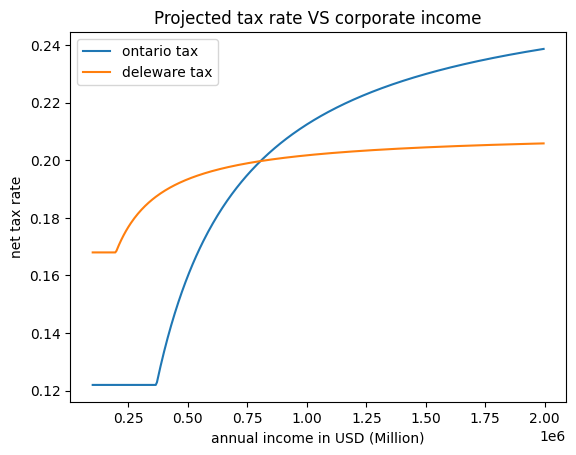

In [19]:
def ont_tax(income):
    SBD_limit = 500_000
    reg_tax = 0.15 +0.115
    SBD_tax = 0.09 + 0.032 
    SBD = min(income, 500_000)
    outside_SBD = max(0, income - SBD)
    return SBD * SBD_tax + outside_SBD * reg_tax

def del_tax(income):
    lower_th = 197_300
    higher_th = 247_300
    reg_tax = 0.21

    lower_th_income = min(lower_th, income)
    outside_th_income = max(0, income - lower_th_income)

    taxable_income = lower_th_income * 0.8 + outside_th_income 
    return taxable_income * reg_tax

import pandas as pd
import matplotlib.pyplot as plt
tax_sim = {}
for i in range(100_000, 2_000_000, 5_000):
    tax_sim[i] = {'ont': ont_tax(i * 1.36) / (i * 1.36), 'del': del_tax(i) / i}     

df = pd.DataFrame(tax_sim)
plt.plot(df.T)
plt.legend()

plt.ylabel('net tax rate')
plt.xlabel('annual income in USD (Million)')
plt.title('Projected tax rate VS corporate income')
plt.legend(['ontario tax', 'deleware tax'])

In [33]:
emission = 0.03
sn_owner_holding = 0.25
alpha_price = 0.03
tao_price = 350

daily_alpha =  7200 * 0.5 * emission * sn_owner_holding
daily_income_USD = alpha_price * daily_alpha * tao_price
yearly_income_USD = daily_income_USD * 365 

print(f"Expected yearly income {yearly_income_USD / 1e6:.2f} Million USD")

Expected yearly income 0.10 Million USD


## bittensor metagraph check 

In [1]:
import json

import os
import re
import json

def get_subnetinfo_files(path):

    # Regex to match: subnetinfo_6968000.json
    pattern = re.compile(r"subnetinfo_(\d+)\.json$")
    subnet_infos = {}
    for filename in os.listdir(path):
        match = pattern.match(filename)
        if not match:
            continue  # skip unrelated files

        block = int(match.group(1))
        filepath = os.path.join(path, filename)

        # Example: read the JSON
        with open(filepath, "r") as f:
            data = json.load(f)

        subnet_infos[block] = data

    return subnet_infos


subnet_infos = get_subnetinfo_files("/home/isabella/crucible/subnet-MoE/bittensor_subnetinfo_daily/")

In [2]:
import pandas as pd
import plotly.express as px
from itertools import chain

for block, subnet_info in subnet_infos.items():
    for s in subnet_info:
        s['block'] = block

subnet_infos = list(chain.from_iterable(subnet_infos.values()))
subnet_infos=pd.DataFrame(subnet_infos)

In [15]:
interested_netuid = [64, 120, 51, 4]

In [16]:
subnet_infos['tao_per_alpha_out'] = subnet_infos.tao_in / subnet_infos.alpha_out

subnet_infos = subnet_infos.sort_values('block')

px.line(
    subnet_infos[(subnet_infos.tao_per_alpha_out <= 1) & subnet_infos.netuid.isin(interested_netuid)],
    y = 'tao_per_alpha_out',
    x = 'block',
    color='netuid',
    height=600,
    title='tao_per_alpha_out'
)

In [31]:
subnet_infos['risk'] = (subnet_infos.price) / (subnet_infos.tao_per_alpha_out)

subnet_infos = subnet_infos.sort_values('block')

px.line(
    subnet_infos[(subnet_infos.risk <= 2) & subnet_infos.netuid.isin(interested_netuid)],
    y = 'risk',
    x = 'block',
    color='netuid',
    height=600,
    title='tao_per_alpha_out_trend',
)

In [ ]:
_subnet_infos = subnet_infos[subnet_infos.netuid == 120]
_subnet_infos.alpha_out[_subnet_infos.alpha_out_emission != 1]

4724     0.0
21718    0.0
29444    0.0
2926     0.0
6937     0.0
25756    0.0
378      0.0
14166    0.0
28130    0.0
12682    0.0
11299    0.0
5220     0.0
11044    0.0
28479    0.0
29316    0.0
18231    0.0
27743    0.0
120      0.0
3497     0.0
16739    0.0
24069    0.0
15296    0.0
6348     0.0
10374    0.0
11779    0.0
17276    0.0
14419    0.0
17018    0.0
16042    0.0
8369     0.0
28828    0.0
10915    0.0
16171    0.0
8611     0.0
27614    0.0
10786    0.0
26441    0.0
26183    0.0
2668     0.0
19177    0.0
27009    0.0
17405    0.0
31219    0.0
21968    0.0
23612    0.0
18720    0.0
12037    0.0
9096     0.0
9483     0.0
15784    0.0
5961     0.0
20063    0.0
Name: alpha_out_emission, dtype: float64